In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#load dataset
athletes = pd.read_csv('C:/Users/Siwar/Desktop/dataset olympics/athletes.csv')
regions = pd.read_csv('C:/Users/Siwar/Desktop/dataset olympics/regions.csv')

In [10]:
#read first 5 lines 
athletes.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [11]:
#read first 5 lines 
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [12]:
#join the dataframes
athletes_df = athletes.merge(regions, how = 'left' , on = 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [31]:
#Column names consistantes

athletes_df.rename(columns={'Name':'Athlete_Name','region':'Region', 'notes':'Notes'} , inplace=True);
athletes_df.head()

,ID,Athlete_Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [33]:
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [34]:
#check null values
nan_values = athletes_df.isna() 
nan_columns = nan_values.any() 
nan_columns
# Age , Height , Weight , Medal ,Region ,Notes missing values 

ID              False
Athlete_Name    False
Sex             False
Age              True
Height           True
Weight           True
Team            False
NOC             False
Games           False
Year            False
Season          False
City            False
Sport           False
Event           False
Medal            True
Region           True
Notes            True
dtype: bool

In [35]:
#total number of null values 
athletes_df.isnull().sum()

ID                   0
Athlete_Name         0
Sex                  0
Age               9474
Height           60171
Weight           62875
Team                 0
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal           231333
Region             370
Notes           266077
dtype: int64

In [42]:
#Tunisia details 
athletes_df.query('Team == "Tunisia"').head()

,ID,Athlete_Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
356,196,Mohamed Abdel Khaled,M,24.0,183.0,76.0,Tunisia,TUN,1976 Summer,1976,Summer,Montreal,Handball,Handball Men's Handball,NaN,Tunisia,NaN
762,436,Haithem Abid,M,22.0,179.0,72.0,Tunisia,TUN,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,NaN,Tunisia,NaN
1219,686,Khaled Achour,M,20.0,177.0,82.0,Tunisia,TUN,1976 Summer,1976,Summer,Montreal,Handball,Handball Men's Handball,NaN,Tunisia,NaN
1220,687,Haykel Al-Achouri,M,23.0,184.0,84.0,Tunisia,TUN,2008 Summer,2008,Summer,Beijing,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN,Tunisia,NaN
1221,687,Haykel Al-Achouri,M,27.0,184.0,84.0,Tunisia,TUN,2012 Summer,2012,Summer,London,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN,Tunisia,NaN


In [47]:
#Top Countries Participating 
Top_10_Countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10) 
Top_10_Countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

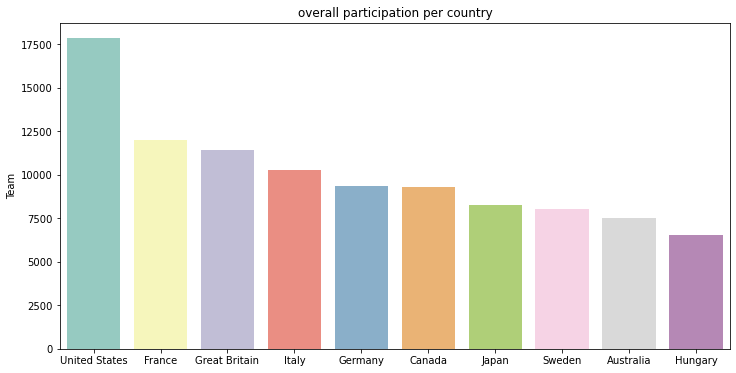

In [55]:
#Plot for the 10 Top Countries Participating 
plt.figure(figsize=(12,6))
plt.title('overall participation per country')
sns.barplot(x=Top_10_Countries.index , y=Top_10_Countries , palette = 'Set3' );

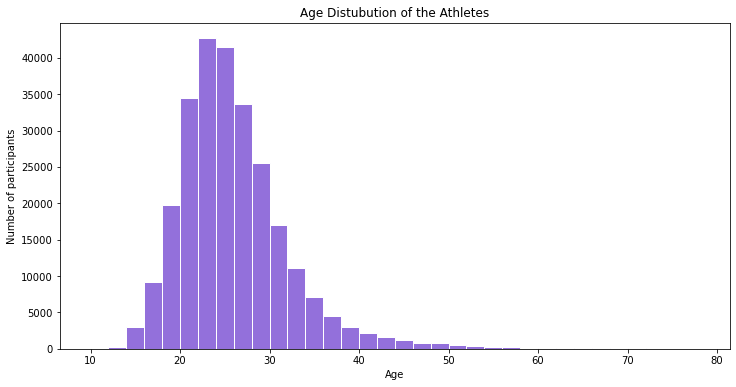

In [94]:
#Age Distubution of the participantes

plt.figure(figsize=(12,6))
plt.title('Age Distubution of the Athletes')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(athletes_df.Age , bins = np.arange(10,80,2), color='mediumpurple' ,edgecolor = 'white');


In [75]:
#Male and female participants 
gender_counts = athletes_df.Sex.value_counts()
gender_counts


M    196594
F     74522
Name: Sex, dtype: int64

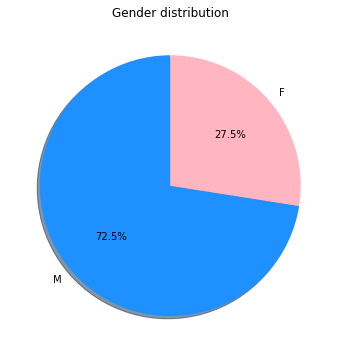

In [95]:
#Pie Plot for Male and female Athletes 

plt.figure(figsize=(9,6))
plt.title('Gender distribution')
plt.pie(gender_counts, labels=gender_counts.index , colors=['dodgerblue','lightpink'] , autopct='%1.1f%%', startangle =90 , shadow =True);

In [100]:
#Total Medals
Total_Medals = athletes_df.Medal.value_counts()
Total_Medals

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [104]:
#total number of female in each olympics
female_participation = athletes_df[(athletes_df.Sex == 'F')][['Sex' , 'Year']]
female_participation = female_participation.groupby('Year').count().reset_index()
female_participation.tail()

,Year,Sex
29,2008,5816
30,2010,1847
31,2012,5815
32,2014,2023
33,2016,6223


In [109]:
women_olympics = athletes_df[(athletes_df.Sex == 'F')]

Text(0.5, 1.0, 'women contribution')

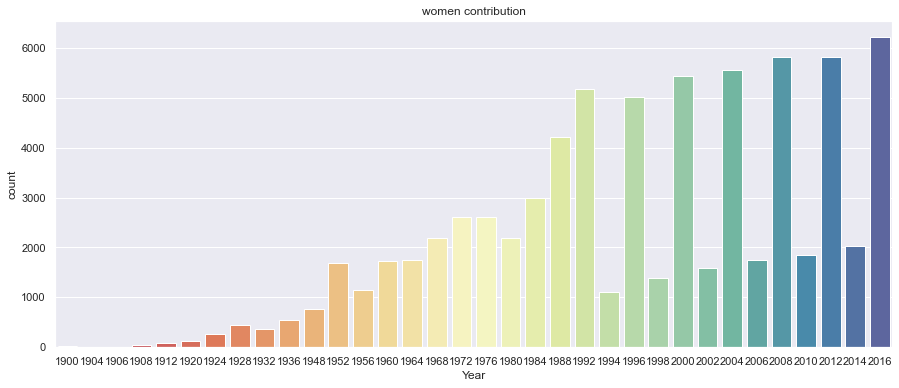

In [111]:
# women contribution in the olympics 
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
sns.countplot(x='Year', data=women_olympics , palette="Spectral")
plt.title('women contribution')

Text(0.5, 1.0, 'Female Athletes over the time')

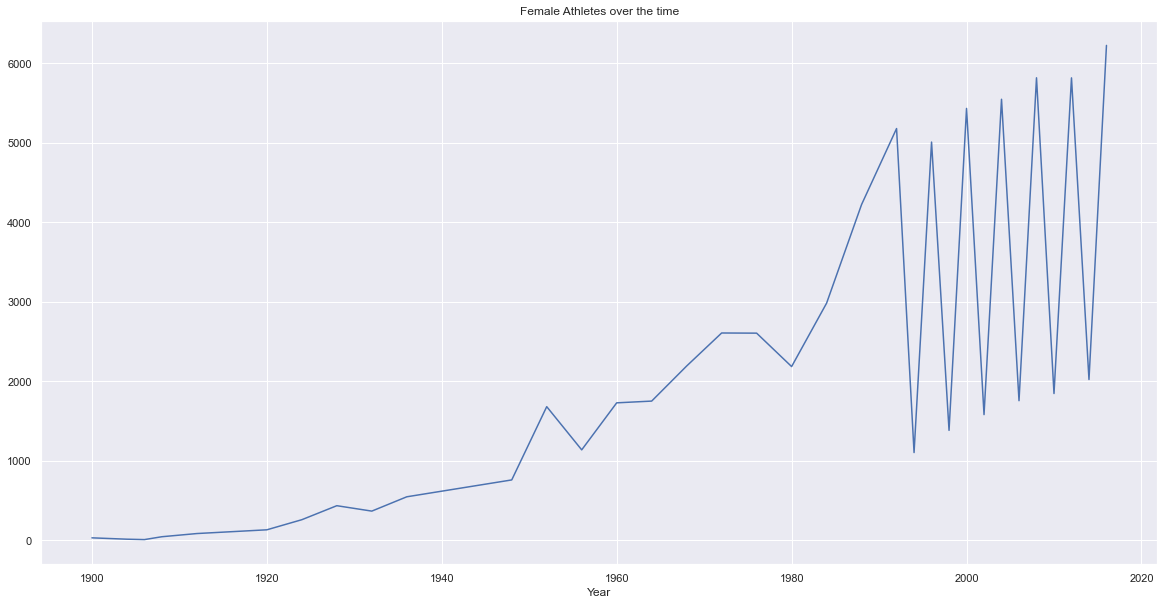

In [113]:
part = women_olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Female Athletes over the time')

In [114]:
#Gold medals athletes
Gold_medals = athletes_df[(athletes_df.Medal == 'Gold')]
Gold_medals.head()


,ID,Athlete_Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [118]:
#take only values that are different from Nan
Gold_medals = Gold_medals[np.isfinite(Gold_medals['Age'])]
#Gold beyond 60 
Gold_medals['ID'][Gold_medals['Age'] > 60].count()

6

In [121]:
sporting_event = Gold_medals['Sport'][(Gold_medals['Age'] > 60)]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

C:\Users\Siwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gold Medals for athelets over 60')

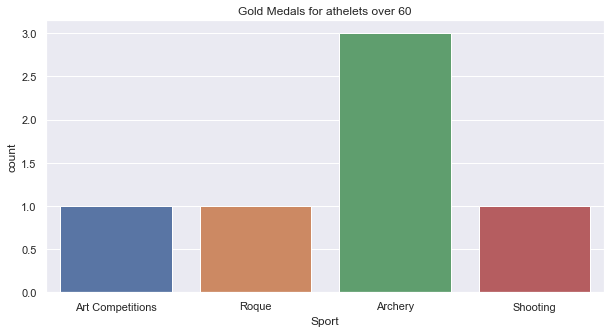

In [122]:
#Plot for sporting_event 
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title('Gold Medals for athelets over 60')

In [124]:
#Gold medals for each country 
Gold_medals.Region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Text(0.5, 1.0, 'Gold Medals Per Country ')

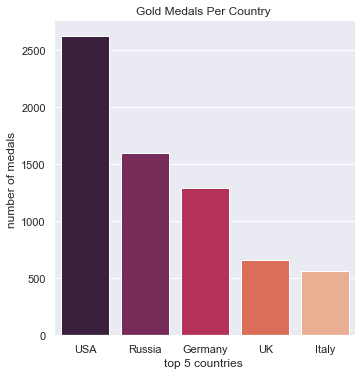

In [136]:
TotalGoldMedals = Gold_medals.Region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal" , data = TotalGoldMedals ,
                height=5 , kind="bar" , palette ="rocket")
g.despine(left=True)
g.set_xlabels("top 5 countries ")
g.set_ylabels("number of medals ")
plt.title('Gold Medals Per Country ')

In [138]:
not_null_medals = athletes_df[(athletes_df['Height'].notnull()) & (athletes_df['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs Weight of olympics medalists')

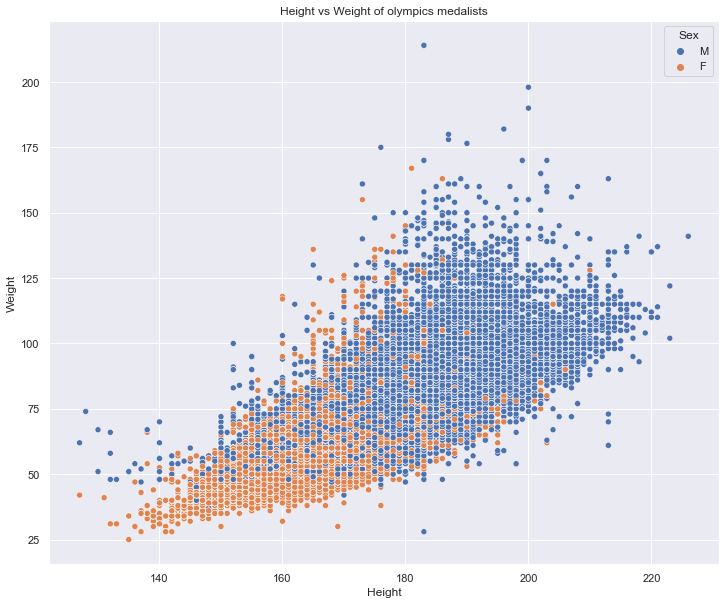

In [139]:
plt.figure(figsize=(12,10))
axis = sns.scatterplot(x="Height" , y="Weight" , data =not_null_medals , hue="Sex" )
plt.title('Height vs Weight of olympics medalists')
